## zad.1
Uruchomiƒá 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mno≈ºenie BLAS w Julii (`A*B`) 

    dla coraz wiƒôkszych macierzy kwadratowych i zmierzyƒá czasy. Narysowaƒá wykres zale≈ºyno≈õci czasu od rozmiaru macierzy wraz z s≈Çupkami b≈Çƒôd√≥w, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny byƒá na jednym wykresie.

In [80]:
using Polynomials, Plots, DataFrames, Statistics, CSV, LinearAlgebra, TaylorSeries

In [21]:
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [22]:
function naive_time(A, B)
    @elapsed naive_multiplication(A, B)
end

function better_time(A, B)
    @elapsed better_multiplication(A, B)
end

function blas_time(A, B)
    @elapsed A * B
end

blas_time (generic function with 1 method)

In [25]:
dfj = DataFrame(n = Int64[], method = String[], time = Float64[])

0√ó3 DataFrame

In [19]:
jump = 50
treadmill = jump:jump:10*jump

50:50:500

In [26]:
for i in treadmill
    for j in 1:10
        A = rand(i, i)
        B = rand(i, i)
        push!(dfj, [i "naive" naive_time(A, B)])
        push!(dfj, [i "better" better_time(A, B)])
        push!(dfj, [i "blas" blas_time(A, B)])
    end
end
dfj

300√ó3 DataFrame
 Row ‚îÇ n      method  time      
     ‚îÇ Int64  String  Float64   
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    50  naive   0.0002553
   2 ‚îÇ    50  better  0.0001274
   3 ‚îÇ    50  blas    2.5e-5
   4 ‚îÇ    50  naive   0.0002657
   5 ‚îÇ    50  better  0.0001257
   6 ‚îÇ    50  blas    1.96e-5
   7 ‚îÇ    50  naive   0.0002625
   8 ‚îÇ    50  better  0.0001215
   9 ‚îÇ    50  blas    1.42e-5
  10 ‚îÇ    50  naive   0.0002666
  11 ‚îÇ    50  better  0.0001199
  ‚ãÆ  ‚îÇ   ‚ãÆ      ‚ãÆ         ‚ãÆ
 291 ‚îÇ   500  blas    0.0030286
 292 ‚îÇ   500  naive   0.338077
 293 ‚îÇ   500  better  0.114085
 294 ‚îÇ   500  blas    0.0028823
 295 ‚îÇ   500  naive   0.339682
 296 ‚îÇ   500  better  0.116941
 297 ‚îÇ   500  blas    0.0032376
 298 ‚îÇ   500  naive   0.338233
 299 ‚îÇ   500  better  0.114336
 300 ‚îÇ   500  blas    0.002919
                279 rows omitted

In [27]:
dfj_grouped = groupby(dfj, [:n, :method])

GroupedDataFrame with 30 groups based on keys: n, method
First Group (10 rows): n = 50, method = "naive"
 Row ‚îÇ n      method  time      
     ‚îÇ Int64  String  Float64   
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    50  naive   0.0002553
   2 ‚îÇ    50  naive   0.0002657
   3 ‚îÇ    50  naive   0.0002625
   4 ‚îÇ    50  naive   0.0002666
   5 ‚îÇ    50  naive   0.0002622
   6 ‚îÇ    50  naive   0.0002603
   7 ‚îÇ    50  naive   0.0002608
   8 ‚îÇ    50  naive   0.0002602
   9 ‚îÇ    50  naive   0.0002589
  10 ‚îÇ    50  naive   0.0002588
‚ãÆ
Last Group (10 rows): n = 500, method = "blas"
 Row ‚îÇ n      method  time      
     ‚îÇ Int64  String  Float64   
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ   500  blas    0.0029916
   2 ‚îÇ   500  blas    0.0032438
   3 ‚îÇ   500  blas    0.0027723
   4 ‚îÇ   500  blas    0.0028853
   5 ‚îÇ   500  blas    0.0072883
   6 ‚îÇ   500  blas    0.0029216
   7 ‚îÇ   500  blas    0.0030286
   8 ‚îÇ   500  blas    0.0028823
   9 ‚îÇ   500  blas    0.0032376
  10 ‚îÇ   500  blas    0.002919

In [28]:
dfj_combined = combine(dfj_grouped, "time" => mean, "time" => std)

30√ó4 DataFrame
 Row ‚îÇ n      method  time_mean   time_std    
     ‚îÇ Int64  String  Float64     Float64     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    50  naive   0.00026113  3.33135e-6
   2 ‚îÇ    50  better  0.00013572  2.0642e-5
   3 ‚îÇ    50  blas    1.744e-5    3.93452e-6
   4 ‚îÇ   100  naive   0.00244139  6.25507e-5
   5 ‚îÇ   100  better  0.00100034  2.51224e-5
   6 ‚îÇ   100  blas    0.00047109  0.000103611
   7 ‚îÇ   150  naive   0.00865675  0.000187359
   8 ‚îÇ   150  better  0.00322214  3.9662e-5
   9 ‚îÇ   150  blas    0.00045376  0.000113208
  10 ‚îÇ   200  naive   0.0208099   0.000226118
  11 ‚îÇ   200  better  0.0075366   4.81933e-5
  ‚ãÆ  ‚îÇ   ‚ãÆ      ‚ãÆ         ‚ãÆ            ‚ãÆ
  21 ‚îÇ   350  blas    0.00158446  0.000197783
  22 ‚îÇ   400  naive   0.17281     0.000779863
  23 ‚îÇ   400  better  0.0593485   0.00280427
  24 ‚îÇ   400  blas    0.00190952  0.000103016
  25 ‚îÇ   450  naive   0.245867    0.000477451
  26 ‚îÇ   450  better  0.0830955   0.000205893
  27 ‚îÇ   450  blas    0.00257862  0.0003423
  28 ‚îÇ   500  naive   0.338456    0.000714578
  29 ‚îÇ   500  better  0.114276    0.00107221
  30 ‚îÇ   500  blas    0.00341704  0.00136864
                                9 rows omitted

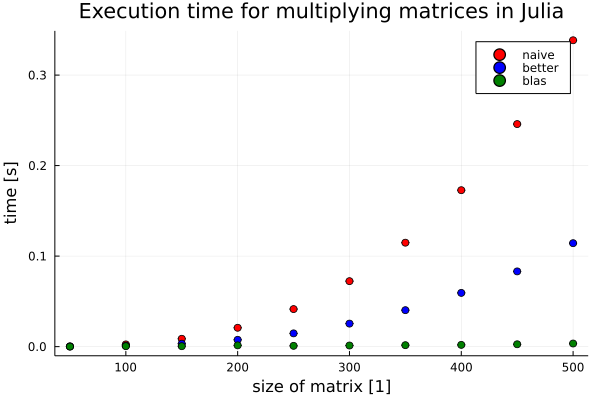

In [29]:
scatter([dfj_combined[dfj_combined[:,2] .== "naive", :].n dfj_combined[dfj_combined[:,2] .== "better", :].n dfj_combined[dfj_combined[:,2] .== "blas", :].n],
    [dfj_combined[dfj_combined[:,2] .== "naive", :].time_mean dfj_combined[dfj_combined[:,2] .== "better", :].time_mean dfj_combined[dfj_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfj_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Execution time for multiplying matrices in Julia",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

## zad.2
Napisaƒá w jƒôzyku C:
   - naiwnƒÖ metodƒô mno≈ºenia macierzy kwadratowych (wersja 1) 
   - ulepszonƒÖ wersjƒô za pomocƒÖ zamiany pƒôtli metodƒô mno≈ºenia macierzy(wersja 2), pamiƒôtajƒÖc, ≈ºe w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej ni≈º w Julii ! 
   - skorzystaƒá z  mo≈ºliwo≈õci BLAS poziom 3 dostƒôpnego w GSL  (przyk≈Çad uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Nale≈ºy por√≥wnywaƒá dzia≈Çanie tych trzech algorytmow bez w≈ÇƒÖczonej opcji optymalizacji kompilatora. Przedstawiƒá wyniki na jednym wykresie tak jak w p.1. (osobno ni≈º p.1).
    
    *(Dla chƒôtnych)* sprawdziƒá, co siƒô dzieje, jak w≈ÇƒÖczymy optymalizacjƒô kompilatora i dodaƒá do wykresu. 

```c
#include <stdio.h>
#include <stdlib.h>
#include <gsl/gsl_blas.h>
#include <float.h>
#include <sys/times.h>
#include <unistd.h>


int digs = DECIMAL_DIG;
clock_t start_time, end_time;
struct tms start_tms, end_tms;


void start_the_time() {
  start_time = times(&start_tms);
}


void end_the_time() {
  end_time = times(&end_tms);
}


double get_time() {
  int ticks_per_sec = sysconf(_SC_CLK_TCK);
  return (double) (end_time - start_time) / ticks_per_sec;
}


void naive_multiply(double** A, double** B, double** C, int n){
    for (int i = 0; i < n; i++)
        for (int j = 0; j < n; j++)
            for (int k = 0; k < n; k++)
                C[i][j] += A[i][k]*B[k][j];
}


void better_multiply(double** A, double** B, double** C, int n){
    for (int i = 0; i < n; i++)
        for (int k = 0; k < n; k++)
            for (int j = 0; j < n; j++)
                C[i][j] += A[i][k]*B[k][j];
}


void free_matrix(double** M, int n) {
    for (int i = 0; i < n; i++) {
        free(M[i]);
    }
    free(M);
}


double** random_matrix(int n) {
    double** M = malloc(n * sizeof(double*));
    for (int i = 0; i < n; i++) {
        M[i] = malloc(n * sizeof(double));
        for (int j = 0; j < n; j++) {
            M[i][j]  = (double) rand() / (double) ((unsigned) (RAND_MAX) + 1);
        }
    }
    return M;
}


double** zeros(int n) {
    double** M = malloc(n * sizeof(double*));
    for (int i = 0; i < n; i++) {
        M[i] = malloc(n * sizeof(double));
        for (int j = 0; j < n; j++) {
            M[i][j]  = 0.0;
        }
    }
    return M;
}


gsl_matrix* random_gsl(int n) {
    gsl_matrix* M = gsl_matrix_alloc(n, n);
    for (int i = 0; i < n; i++) {
        for (int j = 0; j < n; j++) {
            gsl_matrix_set(M, i, j, (double) rand() / (double) ((unsigned) (RAND_MAX) + 1));
        }
    }
    return M;
}


gsl_matrix* zeros_gsl(int n) {
    gsl_matrix* M = gsl_matrix_calloc(n, n);
    return M;
}


int main() {
    char* file_name = "data.csv";
    FILE* file = fopen(file_name, "w");

    int first = 100;
    int jump = 100;
    int last = 1001;

    fprintf(file, "n,method,time");
    double time;

    for (int i = first; i < last; i += jump) {
        for (int j = 0; j < 10; j++) {
            double** A = random_matrix(i);
            double** B = random_matrix(i);
            double** C = zeros(i);

            start_the_time();
            naive_multiply(A, B, C, i);
            end_the_time();
            time = get_time();
            fprintf(file, "\n%d,%s,%.*e", i, "naive", digs, time);

            free_matrix(C, i);
            C = zeros(i);

            start_the_time();
            better_multiply(A, B, C, i);
            end_the_time();
            time = get_time();
            fprintf(file, "\n%d,%s,%.*e", i, "better", digs, time);

            free_matrix(A, i);
            free_matrix(B, i);
            free_matrix(C, i);

            gsl_matrix* a = random_gsl(i);
            gsl_matrix* b = random_gsl(i);
            gsl_matrix* c = zeros_gsl(i);
            start_the_time();
            gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, a, b, 0.0, c);
            end_the_time();
            time = get_time();
            fprintf(file, "\n%d,%s,%.*e", i, "blas", digs, time);

            gsl_matrix_free(a);
            gsl_matrix_free(b);
            gsl_matrix_free(c);
        }
    }

    fclose(file);

    return 0;
}
```

In [30]:
dfO2 = CSV.read("dataO2.csv", delim=",", DataFrame)
dfOfast = CSV.read("dataOfast.csv", delim=",", DataFrame)
dfc = CSV.read("data.csv", delim=",", DataFrame)

300√ó3 DataFrame
 Row ‚îÇ n      method   time    
     ‚îÇ Int64  String7  Float64 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ   100  naive       0.0
   2 ‚îÇ   100  better      0.01
   3 ‚îÇ   100  blas        0.0
   4 ‚îÇ   100  naive       0.0
   5 ‚îÇ   100  better      0.0
   6 ‚îÇ   100  blas        0.01
   7 ‚îÇ   100  naive       0.0
   8 ‚îÇ   100  better      0.0
   9 ‚îÇ   100  blas        0.0
  10 ‚îÇ   100  naive       0.0
  11 ‚îÇ   100  better      0.0
  ‚ãÆ  ‚îÇ   ‚ãÆ       ‚ãÆ        ‚ãÆ
 291 ‚îÇ  1000  blas        1.34
 292 ‚îÇ  1000  naive       2.36
 293 ‚îÇ  1000  better      0.9
 294 ‚îÇ  1000  blas        1.33
 295 ‚îÇ  1000  naive       2.36
 296 ‚îÇ  1000  better      0.91
 297 ‚îÇ  1000  blas        1.34
 298 ‚îÇ  1000  naive       2.37
 299 ‚îÇ  1000  better      0.9
 300 ‚îÇ  1000  blas        1.34
               279 rows omitted

In [31]:
dfO2_grouped = groupby(dfO2, [:n, :method])
dfOfast_grouped = groupby(dfOfast, [:n, :method])
dfc_grouped = groupby(dfc, [:n, :method])

GroupedDataFrame with 30 groups based on keys: n, method
First Group (10 rows): n = 100, method = "naive"
 Row ‚îÇ n      method   time    
     ‚îÇ Int64  String7  Float64 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ   100  naive       0.02
   2 ‚îÇ   100  naive       0.01
   3 ‚îÇ   100  naive       0.01
   4 ‚îÇ   100  naive       0.02
   5 ‚îÇ   100  naive       0.01
   6 ‚îÇ   100  naive       0.01
   7 ‚îÇ   100  naive       0.01
   8 ‚îÇ   100  naive       0.02
   9 ‚îÇ   100  naive       0.01
  10 ‚îÇ   100  naive       0.01
‚ãÆ
Last Group (10 rows): n = 1000, method = "blas"
 Row ‚îÇ n      method   time    
     ‚îÇ Int64  String7  Float64 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ  1000  blas        1.35
   2 ‚îÇ  1000  blas        1.33
   3 ‚îÇ  1000  blas        1.34
   4 ‚îÇ  1000  blas        1.36
   5 ‚îÇ  1000  blas        1.33
   6 ‚îÇ  1000  blas        1.33
   7 ‚îÇ  1000  blas        1.32
   8 ‚îÇ  1000  blas        1.34
   9 ‚îÇ  1000  blas        1.34
  10 ‚îÇ  1000  blas        1.33

In [32]:
dfO2_combined = combine(dfO2_grouped, "time" => mean, "time" => std)
dfOfast_combined = combine(dfOfast_grouped, "time" => mean, "time" => std)
dfc_combined = combine(dfc_grouped, "time" => mean, "time" => std)

30√ó4 DataFrame
 Row ‚îÇ n      method   time_mean  time_std   
     ‚îÇ Int64  String7  Float64    Float64    
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ   100  naive        0.013  0.00483046
   2 ‚îÇ   100  better       0.012  0.00421637
   3 ‚îÇ   100  blas         0.001  0.00316228
   4 ‚îÇ   200  naive        0.096  0.00516398
   5 ‚îÇ   200  better       0.097  0.00483046
   6 ‚îÇ   200  blas         0.008  0.00421637
   7 ‚îÇ   300  naive        0.336  0.00699206
   8 ‚îÇ   300  better       0.322  0.00421637
   9 ‚îÇ   300  blas         0.029  0.00316228
  10 ‚îÇ   400  naive        0.827  0.00948683
  11 ‚îÇ   400  better       0.765  0.00527046
  ‚ãÆ  ‚îÇ   ‚ãÆ       ‚ãÆ         ‚ãÆ          ‚ãÆ
  21 ‚îÇ   700  blas         0.387  0.00674949
  22 ‚îÇ   800  naive        8.102  0.0477959
  23 ‚îÇ   800  better       6.101  0.00316228
  24 ‚îÇ   800  blas         0.614  0.00516398
  25 ‚îÇ   900  naive       11.753  0.0899444
  26 ‚îÇ   900  better       8.686  0.00516398
  27 ‚îÇ   900  blas         0.945  0.0117851
  28 ‚îÇ  1000  naive       16.089  0.0412176
  29 ‚îÇ  1000  better      11.915  0.00527046
  30 ‚îÇ  1000  blas         1.337  0.011595
                               9 rows omitted

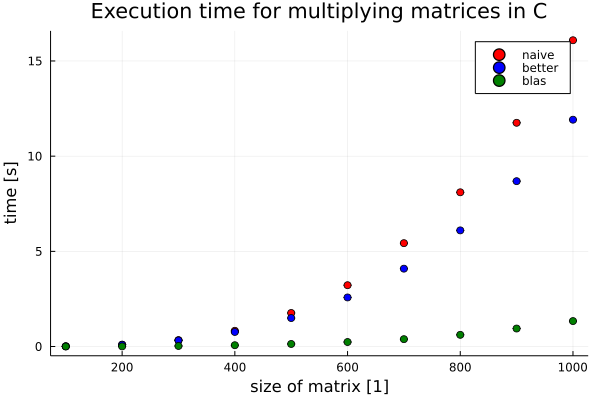

In [33]:
scatter([dfc_combined[dfc_combined[:,2] .== "naive", :].n dfc_combined[dfc_combined[:,2] .== "better", :].n dfc_combined[dfc_combined[:,2] .== "blas", :].n],
    [dfc_combined[dfc_combined[:,2] .== "naive", :].time_mean dfc_combined[dfc_combined[:,2] .== "better", :].time_mean dfc_combined[dfc_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfc_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

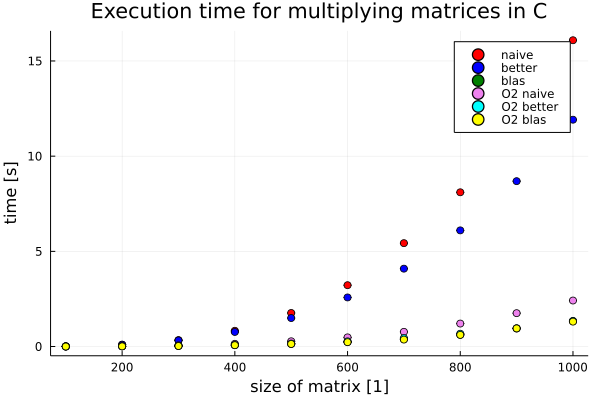

In [34]:
scatter!([dfO2_combined[dfO2_combined[:,2] .== "naive", :].n dfO2_combined[dfO2_combined[:,2] .== "better", :].n dfO2_combined[dfO2_combined[:,2] .== "blas", :].n],
    [dfO2_combined[dfO2_combined[:,2] .== "naive", :].time_mean dfO2_combined[dfO2_combined[:,2] .== "better", :].time_mean dfO2_combined[dfO2_combined[:,2] .== "blas", :].time_mean],
    colour = [:violet :cyan :yellow],
    yerr = dfO2_combined.time_std,
    label = ["O2 naive" "O2 better" "O2 blas"],
    title = "Execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

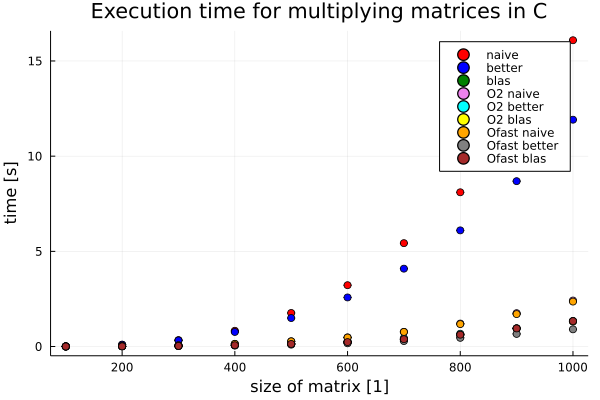

In [35]:
scatter!([dfOfast_combined[dfOfast_combined[:,2] .== "naive", :].n dfOfast_combined[dfOfast_combined[:,2] .== "better", :].n dfOfast_combined[dfOfast_combined[:,2] .== "blas", :].n],
    [dfOfast_combined[dfOfast_combined[:,2] .== "naive", :].time_mean dfOfast_combined[dfOfast_combined[:,2] .== "better", :].time_mean dfOfast_combined[dfOfast_combined[:,2] .== "blas", :].time_mean],
    colour = [:orange :grey :brown],
    yerr = dfOfast_combined.time_std,
    label = ["Ofast naive" "Ofast better" "Ofast blas"],
    title = "Execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)

## zad.3
U≈ºyƒá funkcji `polyfit` z pakietu  Polynomials do znalezienia odpowiednich wielomian√≥w, kt√≥re najlepiej pasujƒÖ do zale≈ºno≈õci czasowych ka≈ºdego z algorytm√≥w. Stopie≈Ñ wielomianu powinien zgadzaƒá siƒô z teoretycznƒÖ z≈Ço≈ºonosciƒÖ. Dodaƒá wykresy uzyskanych wielomian√≥w do wcze≈õniejszych wykres√≥w.

In [42]:
x_j = dfj_combined[dfj_combined[:,2] .== "naive", :].n
y_j_naive = dfj_combined[dfj_combined[:,2] .== "naive", :].time_mean
y_j_better = dfj_combined[dfj_combined[:,2] .== "better", :].time_mean
y_j_blas = dfj_combined[dfj_combined[:,2] .== "blas", :].time_mean

10-element Vector{Float64}:
 1.744e-5
 0.00047109000000000007
 0.00045376
 0.0013853000000000001
 0.0008512000000000001
 0.0012080200000000002
 0.0015844599999999998
 0.00190952
 0.0025786200000000002
 0.0034170399999999997

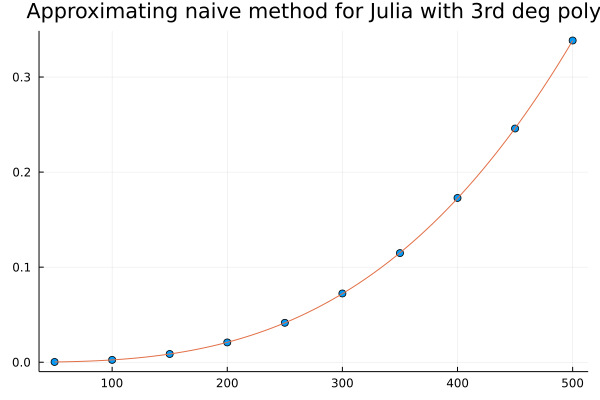

In [45]:
scatter(x_j, y_j_naive, label="")
polyfit_j_naive = fit(x_j, y_j_naive, 3)
plot!(polyfit_j_naive, extrema(x_j)..., label="",
    title="Approximating naive method for Julia with 3rd deg poly")

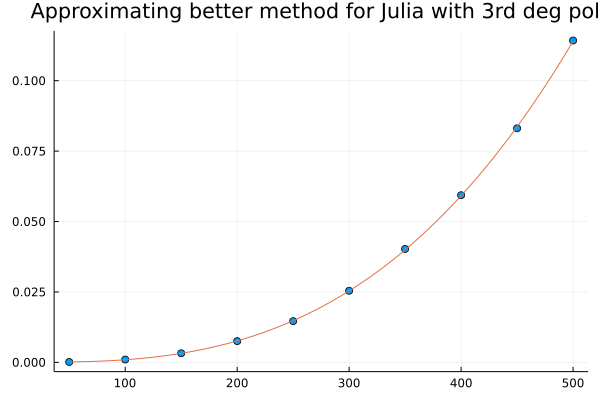

In [46]:
scatter(x_j, y_j_better, label="")
polyfit_j_better = fit(x_j, y_j_better, 3)
plot!(polyfit_j_better, extrema(x_j)..., label="",
    title="Approximating better method for Julia with 3rd deg poly")

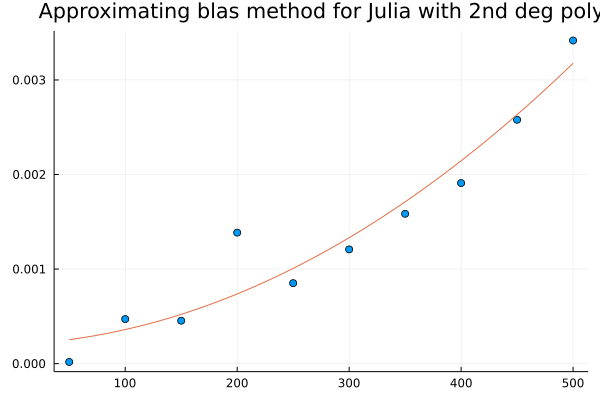

In [47]:
scatter(x_j, y_j_blas, label="")
polyfit_j_blas = fit(x_j, y_j_blas, 2)
plot!(polyfit_j_blas, extrema(x_j)..., label="",
    title="Approximating blas method for Julia with 2nd deg poly")

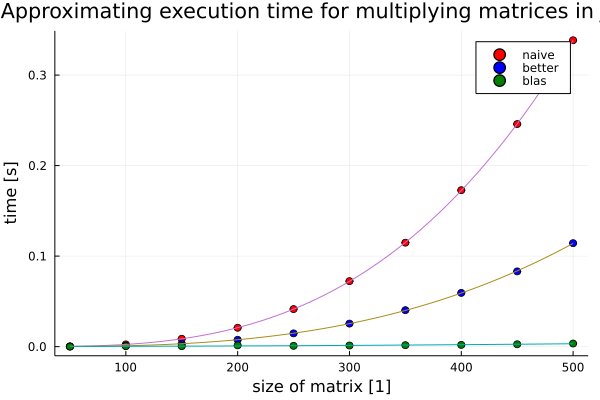

In [48]:
scatter([dfj_combined[dfj_combined[:,2] .== "naive", :].n dfj_combined[dfj_combined[:,2] .== "better", :].n dfj_combined[dfj_combined[:,2] .== "blas", :].n],
    [dfj_combined[dfj_combined[:,2] .== "naive", :].time_mean dfj_combined[dfj_combined[:,2] .== "better", :].time_mean dfj_combined[dfj_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfj_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Approximating execution time for multiplying matrices in Julia",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)
plot!(polyfit_j_naive, extrema(x_j)..., label="")
plot!(polyfit_j_better, extrema(x_j)..., label="")
plot!(polyfit_j_blas, extrema(x_j)..., label="")

In [49]:
x_c = dfc_combined[dfc_combined[:,2] .== "naive", :].n
y_c_naive = dfc_combined[dfc_combined[:,2] .== "naive", :].time_mean
y_c_better = dfc_combined[dfc_combined[:,2] .== "better", :].time_mean
y_c_blas = dfc_combined[dfc_combined[:,2] .== "blas", :].time_mean

10-element Vector{Float64}:
 0.001
 0.008
 0.029000000000000005
 0.06900000000000002
 0.13400000000000004
 0.23699999999999996
 0.387
 0.6140000000000001
 0.945
 1.3370000000000002

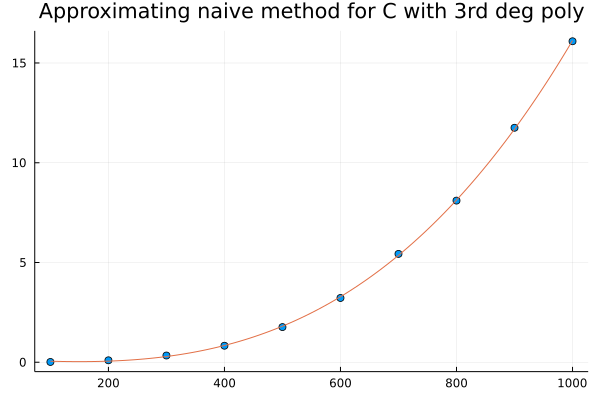

In [50]:
scatter(x_c, y_c_naive, label="")
polyfit_c_naive = fit(x_c, y_c_naive, 3)
plot!(polyfit_c_naive, extrema(x_c)..., label="",
    title="Approximating naive method for C with 3rd deg poly")

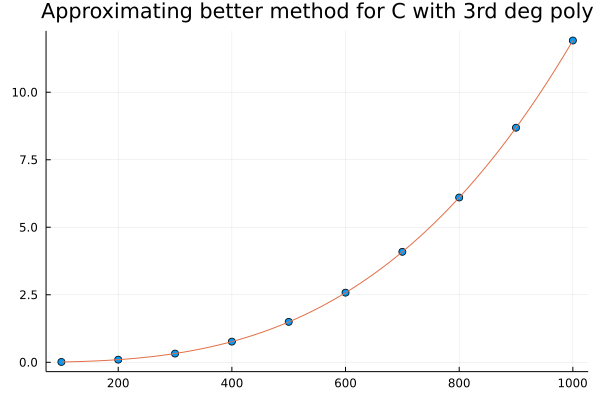

In [51]:
scatter(x_c, y_c_better, label="")
polyfit_c_better = fit(x_c, y_c_better, 3)
plot!(polyfit_c_better, extrema(x_c)..., label="",
    title="Approximating better method for C with 3rd deg poly")

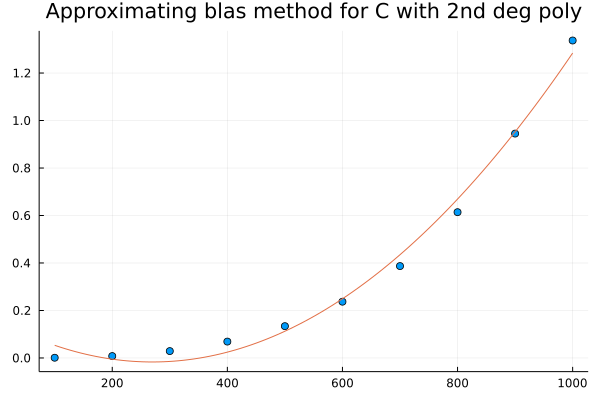

In [52]:
scatter(x_c, y_c_blas, label="")
polyfit_c_blas = fit(x_c, y_c_blas, 2)
plot!(polyfit_c_blas, extrema(x_c)..., label="",
    title="Approximating blas method for C with 2nd deg poly")

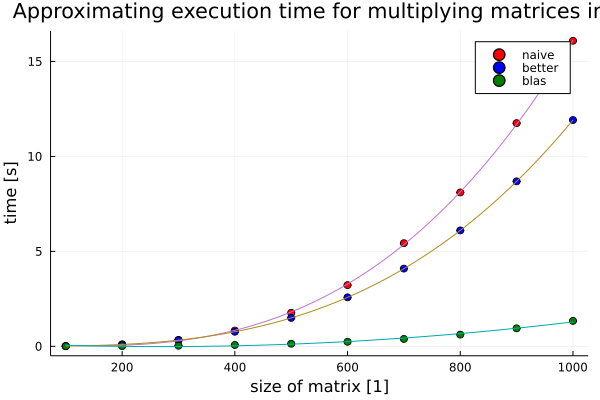

In [54]:
scatter([dfc_combined[dfc_combined[:,2] .== "naive", :].n dfc_combined[dfc_combined[:,2] .== "better", :].n dfc_combined[dfc_combined[:,2] .== "blas", :].n],
    [dfc_combined[dfc_combined[:,2] .== "naive", :].time_mean dfc_combined[dfc_combined[:,2] .== "better", :].time_mean dfc_combined[dfc_combined[:,2] .== "blas", :].time_mean],
    colour = [:red :blue :green],
    yerr = dfc_combined.time_std,
    label = ["naive" "better" "blas"],
    title = "Approximating execution time for multiplying matrices in C",
    xlab = "size of matrix [1]",
    ylab = "time [s]"
)
plot!(polyfit_c_naive, extrema(x_c)..., label="")
plot!(polyfit_c_better, extrema(x_c)..., label="")
plot!(polyfit_c_blas, extrema(x_c)..., label="")

## zad.4
Pokazaƒá zniwelowanie efektu Rungego (przy interpolacji) poprzez u≈ºycie wsparcia dla wielomian√≥w Czebyszewa w pakiecie Polynomials. Narysowaƒá wybranƒÖ funkcjƒô z zaznaczonymi wƒôz≈Çami i wielomianem interpolacyjnym dla wƒôz≈Ç√≥w r√≥wnoodleg≈Çych oraz Czebyszewa (2 wykresy).

In [56]:
f(x) = 1 / (1 + x^4)

f (generic function with 1 method)

In [57]:
X = -5:1:5
Y = [f(x) for x in X]

11-element Vector{Float64}:
 0.001597444089456869
 0.0038910505836575876
 0.012195121951219513
 0.058823529411764705
 0.5
 1.0
 0.5
 0.058823529411764705
 0.012195121951219513
 0.0038910505836575876
 0.001597444089456869

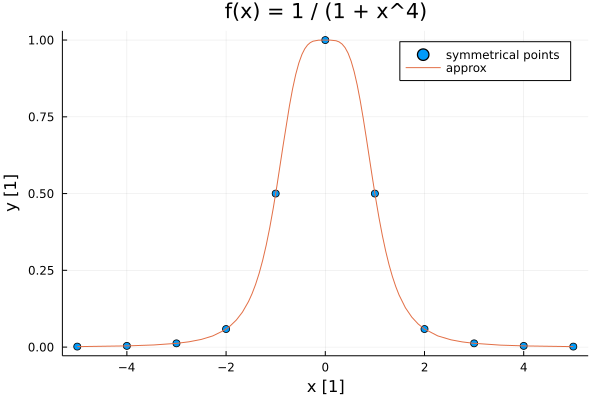

In [74]:
scatter(X, Y, label="symmetrical points", title="f(x) = 1 / (1 + x^4)", xlabel="x [1]", ylabel="y [1]")
plot!(f,  extrema(X)..., label="approx")

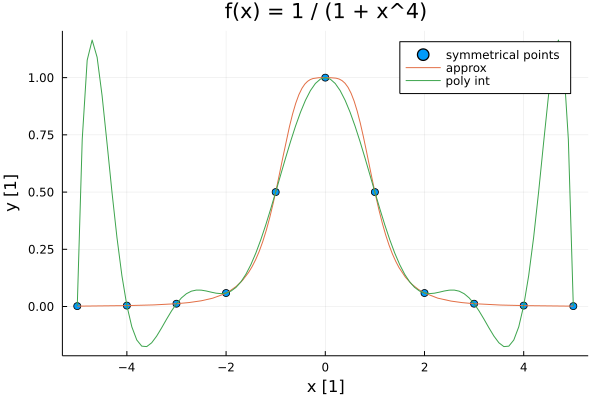

In [75]:
poly_fit = fit(X, Y)
plot!(poly_fit, extrema(X)..., label="poly int")

In [67]:
chebyshev_base = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
chebyshev_poly = ChebyshevT(chebyshev_base)
X_chebyshev = 5 * Polynomials.roots(chebyshev_poly)
Y_chebyshev = [f(x) for x in X_chebyshev]

10-element Vector{Float64}:
 0.0016784589203126597
 0.0025321844527311102
 0.006359300476947392
 0.03629743515709617
 0.7276477472334709
 0.7276477472334706
 0.03629743515709604
 0.00635930047694741
 0.002532184452731044
 0.0016784589203126872

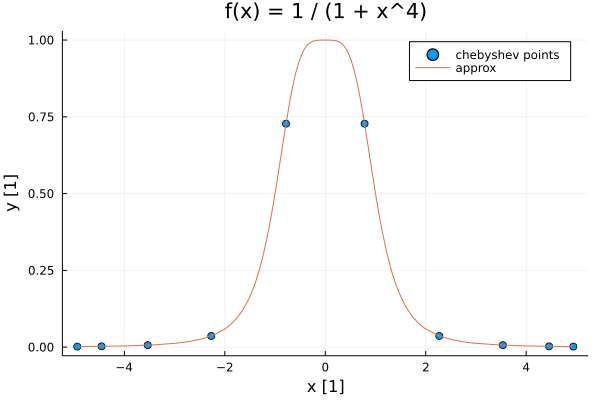

In [76]:
scatter(X_chebyshev, Y_chebyshev, label="chebyshev points", title="f(x) = 1 / (1 + x^4)", xlabel="x [1]", ylabel="y [1]")
plot!(f,  extrema(X_chebyshev)..., label="approx")

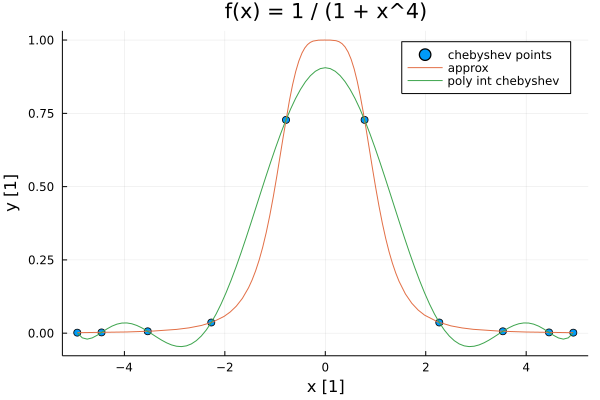

In [77]:
poly_fit_chebyshev = fit(X_chebyshev, Y_chebyshev)
plot!(poly_fit_chebyshev, extrema(X_chebyshev)..., label="poly int chebyshev")

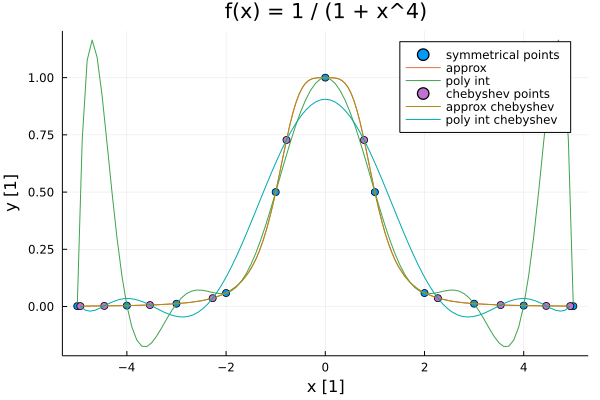

In [78]:
scatter(X, Y, label="symmetrical points", title="f(x) = 1 / (1 + x^4)", xlabel="x [1]", ylabel="y [1]")
plot!(f,  extrema(X)..., label="approx")
poly_fit = fit(X, Y)
plot!(poly_fit, extrema(X)..., label="poly int")
scatter!(X_chebyshev, Y_chebyshev, label="chebyshev points")
plot!(f,  extrema(X_chebyshev)..., label="approx chebyshev")
poly_fit_chebyshev = fit(X_chebyshev, Y_chebyshev)
plot!(poly_fit_chebyshev, extrema(X_chebyshev)..., label="poly int chebyshev")

## zad.5
Przybli≈ºenie Pade jest czƒôsto lepsze ni≈º rozwiniƒôcie w szereg Taylora przy aproksymowaniu funkcji, kt√≥re posiadajƒÖ osobliwo≈õci. KorzystajƒÖc ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazaƒá dowolny przyk≈Çad (wraz z wykresem), gdzie takie przybli≈ºenie faktycznie jest lepsze.

In [88]:
f(x) = log(1 + x) / x

f (generic function with 1 method)

In [120]:
taylor_base = Taylor1(Float64, 5)

 1.0 t + ùí™(t‚Å∂)

In [121]:
taylor_poly = Polynomial(f(taylor_base).coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4)

In [122]:
X = [x for x in 1.0:5.0]
pushfirst!(X, 0.01)
# Y = [f(x) for x in X]

6-element Vector{Float64}:
 0.01
 1.0
 2.0
 3.0
 4.0
 5.0

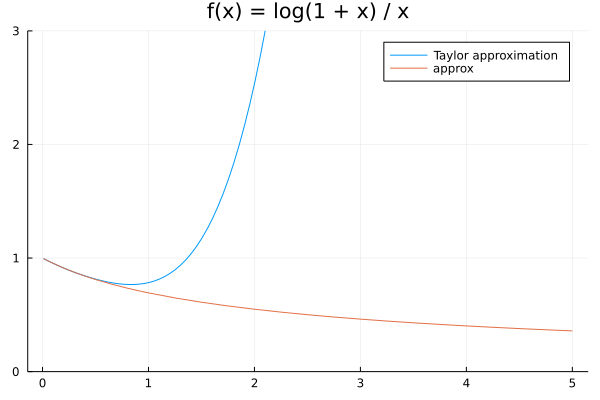

In [138]:
plot(taylor_poly, extrema(X)..., label="Taylor approximation", title="f(x) = log(1 + x) / x", ylims=(0, 3))
plot!(f, extrema(X)..., label="approx")

In [128]:
pade_object = Polynomials.PolyCompat.PadeApproximation.Pade(taylor_poly, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.6999999999999987*x + 0.03333333333333298*x^2), Polynomial(1.0 + 1.1999999999999986*x + 0.29999999999999905*x^2), :x)

In [130]:
pade_polynomial(x) = pade_object.p(x) / pade_object.q(x)

pade_polynomial (generic function with 1 method)

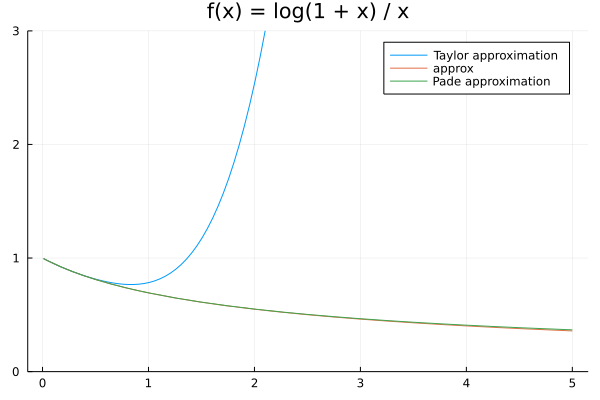

In [139]:
plot!(pade_polynomial, extrema(X)..., label="Pade approximation")